In [ ]:
!pip install df2img

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.0 MB/s eta 0:00:00


In [ ]:
!pip install pandas openpyxl

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# paths

In [ ]:
path_netMamba = {
    "CICIoT2022": "/content/drive/MyDrive/upwork_data/result_finetuning/result_NetMamba/CICIoT2022/test_stats.json",
    "ISCXTor2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_NetMamba/ISCXTor2016/test_stats.json",
    "ISCXVPN2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_NetMamba/ISCXVPN2016/test_stats.json",
    "USTC_TFC2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_NetMamba/USTC_TFC2016/test_stats.json"
}

path_yatc = {
    "CICIoT2022": "/content/drive/MyDrive/upwork_data/result_finetuning/result_yatc/Result_yatc_CICIoT2022.json",
    "ISCXTor2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_yatc/Result_yatc_ISCXTor2016.json",
    "ISCXVPN2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_yatc/Result_yatc_ISCXVPN2016.json",
    "USTC_TFC2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_yatc/Result_yatc_USTC-TFC2016.json"
}

path_etbert = {
    "CICIoT2022": "/content/drive/MyDrive/upwork_data/result_finetuning/result_etbert/result_etbert_CICIoT2022.json",
    "ISCXTor2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_etbert/result_etbert_ISCXTor2016.json",
    "ISCXVPN2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_etbert/result_etbert_ISCXVPN2016.json",
    "USTC_TFC2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_etbert/result_etbert_USTC-TFC2016.json"
}
path_lstm = {
    "CICIoT2022": "/content/drive/MyDrive/upwork_data/result_finetuning/result_lstm/model_lstm_attention_ciciot_result.json",
    "ISCXTor2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_lstm/model_lstm_attention_tor_result.json",
    "ISCXVPN2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_lstm/model_lstm_attention_iscx_result.json",
    "USTC_TFC2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_lstm/model_lstm_attention_ustf_result.json"
}



In [ ]:
label_mappings_netMamba = {
    "CICIoT2022": ["Audio", "Cameras", "Flood", "Home-Automation", "Hydra", "Nmap"],
    "ISCXTor2016": ["Audio", "Browsing", "Chat", "File-transfer", "Mail", "P2P", "Video", "Voip"],
    "ISCXVPN2016": ["Browsing", "Chat", "Email", "Ftp", "P2P", "Streaming", "Voip"],
    "USTC_TFC2016": [
        'BitTorrent', 'Cridex', 'Facetime', 'FTP', 'Geodo', 'Gmail', 'Htbot',
        'Miuref', 'MySQL', 'Neris', 'Nsis-ay', 'Outlook', 'Shifu', 'Skype',
        'Tinba', 'Virut', 'Weibo', 'WorldOfWarcraft', 'Zeus'
    ]
}
label_mappings_etbert = {
    "CICIoT2022": ["Audio", "Cameras", "Flood", "Home-Automation", "Hydra", "Nmap"],
    "ISCXTor2016": ["Audio", "Browsing", "Chat", "File-transfer", "Mail", "P2P", "Video", "Voip"],
    "ISCXVPN2016": ["Chat", "Email", "Ftp", "Streaming","P2P", "Voip","Browsing"],
    "USTC_TFC2016": [
        'BitTorrent', 'Cridex', 'Facetime', 'FTP', 'Geodo', 'Gmail', 'Htbot',
        'Miuref', 'MySQL', 'Neris', 'Nsis-ay', 'Outlook', 'Shifu', 'Skype',"SMB",
        'Tinba', 'Virut', 'Weibo', 'WorldOfWarcraft', 'Zeus'
    ]
}

label_mappings_lstm = {
    "CICIoT2022": ["Audio", "Cameras", "Flood", "Home-Automation", "Hydra", "Nmap"],
    "ISCXTor2016": ["Audio", "Browsing", "Chat", "File-transfer", "Mail", "P2P", "Video", "Voip"],
    "ISCXVPN2016": ["Chat", "Email", "Ftp", "Streaming","P2P", "Voip","Browsing"],
    "USTC_TFC2016": [
        'BitTorrent', 'Cridex', 'Facetime', 'FTP', 'Geodo', 'Gmail', 'Htbot',
        'Miuref', 'MySQL', 'Neris', 'Nsis-ay', 'Outlook', 'Shifu', 'Skype',"SMB",
        'Tinba', 'Virut', 'Weibo', 'WorldOfWarcraft', 'Zeus'
    ]
}

label_mappings_yatc = {
    "CICIoT2022": ["Audio", "Cameras", "Flood", "Home-Automation", "Hydra", "Nmap"],
    "ISCXTor2016": ["Audio", "Browsing", "Chat", "File-transfer", "Mail", "P2P", "Video", "Voip"],
    "ISCXVPN2016": ["Chat", "Email", "Ftp", "Streaming","P2P", "Voip","Browsing"],
    "USTC_TFC2016": [
        'BitTorrent', 'Cridex', 'Facetime', 'FTP', 'Geodo', 'Gmail', 'Htbot',
        'Miuref', 'MySQL', 'Neris', 'Nsis-ay', 'Outlook', 'Shifu', 'Skype',"SMB",
        'Tinba', 'Virut', 'Weibo', 'WorldOfWarcraft', 'Zeus'
    ]
}


# values

In [ ]:
# Store results
metrics_data_yatc = []
conf_matrices_yatc = {}
# Load each JSON
for name, path in path_yatc.items():
    with open(path, 'r') as f:
        data = json.load(f)
        metrics_data_yatc.append({
            "Dataset": name,
            "Accuracy": data["acc"],
            "Precision": data["weighted_pre"],
            "Recall": data["weighted_rec"],
            "F1 Score": data["weighted_f1"]
        })
        conf_matrices_yatc[name] = data["cm"]


In [ ]:
# Store results
metrics_data_etbert = []
conf_matrices_etbert = {}
# Load each JSON
for name, path in path_etbert.items():
    with open(path, 'r') as f:
        data = json.load(f)
        metrics_data_etbert.append({
            "Dataset": name,
            "Accuracy": data["acc"],
            "Precision": data["weighted_pre"],
            "Recall": data["weighted_rec"],
            "F1 Score": data["weighted_f1"]
        })
        conf_matrices_etbert[name] = data["cm"]


In [ ]:
# Store results
metrics_data_netMamba = []
conf_matrices_netMamba = {}
# Load each JSON
for name, path in path_yatc.items():
    with open(path, 'r') as f:
        data = json.load(f)
        metrics_data_netMamba.append({
            "Dataset": name,
            "Accuracy": data["acc"],
            "Precision": data["weighted_pre"],
            "Recall": data["weighted_rec"],
            "F1 Score": data["weighted_f1"]
        })
        conf_matrices_netMamba[name] = data["cm"]


In [ ]:
conf_matrices_netMamba

{'CICIoT2022': [[548, 1, 0, 0, 0, 0],
  [1, 822, 0, 0, 0, 0],
  [0, 1, 805, 1, 0, 0],
  [5, 2, 0, 92, 0, 0],
  [0, 2, 0, 0, 40, 0],
  [0, 0, 0, 0, 0, 718]],
 'ISCXTor2016': [[48, 0, 0, 0, 0, 0, 0, 0],
  [1, 91, 0, 0, 0, 0, 0, 0],
  [0, 0, 56, 0, 0, 0, 0, 0],
  [0, 0, 1, 23, 0, 0, 0, 0],
  [0, 0, 0, 0, 24, 0, 0, 0],
  [0, 0, 0, 1, 0, 35, 0, 0],
  [0, 1, 0, 0, 0, 0, 27, 0],
  [0, 0, 0, 1, 0, 0, 0, 55]],
 'ISCXVPN2016': [[26, 0, 0, 0, 4, 0, 1],
  [0, 44, 2, 0, 0, 5, 0],
  [0, 0, 173, 0, 0, 0, 0],
  [0, 0, 0, 28, 0, 0, 0],
  [0, 0, 1, 0, 50, 0, 0],
  [0, 1, 0, 0, 0, 163, 0],
  [0, 0, 0, 0, 0, 0, 73]],
 'USTC_TFC2016': [[15,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 202, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 82, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# Store results
metrics_data_lstm = []
conf_matrices_lstm = {}
# Load each JSON
for name, path in path_lstm.items():
    with open(path, 'r') as f:
        data = json.load(f)
        metrics_data_lstm.append({
            "Dataset": name,
            "Accuracy": data["acc"],
            "Precision": data["weighted_pre"],
            "Recall": data["weighted_rec"],
            "F1 Score": data["weighted_f1"]
        })
        conf_matrices_lstm[name] = data["cm"]

In [ ]:
# Convert to DataFrame
summary_df_yatc = pd.DataFrame(metrics_data_yatc)
summary_df_yatc.set_index("Dataset", inplace=True)
summary_df_yatc = summary_df_yatc.round(4)  # optional: round values
summary_df_yatc
#----------------------------------------------------
# Convert to DataFrame
summary_df_etbert = pd.DataFrame(metrics_data_etbert)
summary_df_etbert.set_index("Dataset", inplace=True)
summary_df_etbert = summary_df_etbert.round(4)  # optional: round values
summary_df_etbert
#--------------------------------------------------------------
# Convert to DataFrame
summary_df_lstm = pd.DataFrame(metrics_data_lstm)
summary_df_lstm.set_index("Dataset", inplace=True)
summary_df_lstm = summary_df_lstm.round(4)  # optional: round values
summary_df_lstm
#--------------------------------------------------------------
# Convert to DataFrame
summary_df_netMamba = pd.DataFrame(metrics_data_netMamba)
summary_df_netMamba.set_index("Dataset", inplace=True)
summary_df_netMamba = summary_df_netMamba.round(4)  # optional: round values
summary_df_netMamba



,Accuracy,Precision,Recall,F1 Score
Dataset,,,,
CICIoT2022,0.9957,0.9957,0.9957,0.9957
ISCXTor2016,0.9863,0.9866,0.9863,0.9863
ISCXVPN2016,0.9755,0.9760,0.9755,0.9749
USTC_TFC2016,0.9654,0.9654,0.9654,0.9654


# table and cm

In [ ]:
def metrics_per_label(cm_list,labels):
  cm=np.array(cm_list)
  metrics = []
  for i, label in enumerate(labels):
      TP = cm[i, i]
      FP = cm[:, i].sum() - TP
      FN = cm[i, :].sum() - TP
      TN = cm.sum() - (TP + FP + FN)

      precision = TP / (TP + FP) if (TP + FP) > 0 else 0
      recall = TP / (TP + FN) if (TP + FN) > 0 else 0
      f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
      accuracy = (TP + TN) / cm.sum()

      metrics.append([label, precision, recall, f1, accuracy])

  df = pd.DataFrame(metrics, columns=["Label", "Precision", "Recall", "F1-score", "Accuracy"])
  return df
  print(df)


In [ ]:
#this code is for generating excel sheet per label, u can replace the variable for the model result u wanna get
output_dir = "/content"
def list_detail_result(model:str,conf_matrix,label_mappings):
  df_all = {} # dictionnary for stocking all the dataframe representing the result of a model in on dataset
  for dataset_name,cm in conf_matrix.items():
    labels = label_mappings.get(dataset_name, [str(i) for i in range(len(cm))])
    print(labels)
    df=metrics_per_label(cm,labels)
    df_all[f"{model}_{dataset_name}"]=df
  return df_all


In [ ]:
dict_alls={}
#------------------------------------------------------------------------
dict1=list_detail_result("etbert",conf_matrices_etbert,label_mappings_etbert)
dict2=list_detail_result("lstm",conf_matrices_lstm,label_mappings_lstm)
dict3=list_detail_result("yatc",conf_matrices_yatc,label_mappings_yatc)
dict4=list_detail_result("netMamba",conf_matrices_netMamba,label_mappings_netMamba)
#---------------------------------------------------------------------------------------

dict_alls.update(dict1)
dict_alls.update(dict2)
dict_alls.update(dict3)
dict_alls.update(dict4)

#--------------------------------------------------------------------------------------

#transform to excel sheet
with pd.ExcelWriter('report_per_label.xlsx', engine='openpyxl') as writer:
  for dataset_name,df in dict_alls.items():
    df.to_excel(writer, sheet_name=dataset_name,index=False)

['Audio', 'Cameras', 'Flood', 'Home-Automation', 'Hydra', 'Nmap']
['Audio', 'Browsing', 'Chat', 'File-transfer', 'Mail', 'P2P', 'Video', 'Voip']
['Chat', 'Email', 'Ftp', 'Streaming', 'P2P', 'Voip', 'Browsing']
['BitTorrent', 'Cridex', 'Facetime', 'FTP', 'Geodo', 'Gmail', 'Htbot', 'Miuref', 'MySQL', 'Neris', 'Nsis-ay', 'Outlook', 'Shifu', 'Skype', 'SMB', 'Tinba', 'Virut', 'Weibo', 'WorldOfWarcraft', 'Zeus']
['Audio', 'Cameras', 'Flood', 'Home-Automation', 'Hydra', 'Nmap']
['Audio', 'Browsing', 'Chat', 'File-transfer', 'Mail', 'P2P', 'Video', 'Voip']
['Chat', 'Email', 'Ftp', 'Streaming', 'P2P', 'Voip', 'Browsing']
['BitTorrent', 'Cridex', 'Facetime', 'FTP', 'Geodo', 'Gmail', 'Htbot', 'Miuref', 'MySQL', 'Neris', 'Nsis-ay', 'Outlook', 'Shifu', 'Skype', 'SMB', 'Tinba', 'Virut', 'Weibo', 'WorldOfWarcraft', 'Zeus']
['Audio', 'Cameras', 'Flood', 'Home-Automation', 'Hydra', 'Nmap']
['Audio', 'Browsing', 'Chat', 'File-transfer', 'Mail', 'P2P', 'Video', 'Voip']
['Chat', 'Email', 'Ftp', 'Streaming

In [ ]:
#transform to excel sheet
with pd.ExcelWriter('report_updated.xlsx', engine='openpyxl') as writer:
    summary_df_yatc.to_excel(writer, sheet_name='yatc',index=True)
    summary_df_etbert.to_excel(writer, sheet_name='etbert',index=True)
    summary_df_lstm.to_excel(writer, sheet_name='lstm',index=True)
    summary_df_netMamba.to_excel(writer, sheet_name='netMamba',index=True)

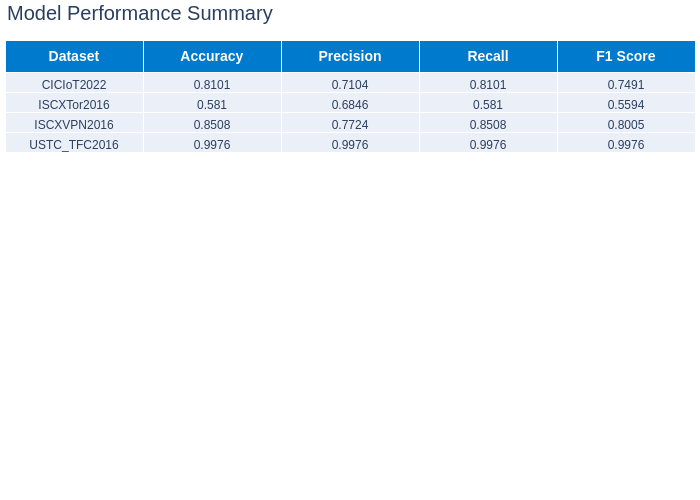

In [ ]:
import df2img

fig = df2img.plot_dataframe(
    summary_df_lstm,  # must not have index for df2img
    title=dict(text="Model Performance Summary", font_size=20),
    tbl_header=dict(align="center", fill_color="#007acc", font=dict(color="white", size=14)),
    tbl_cells=dict(align="center", font=dict(size=12))
)

df2img.save_dataframe(fig=fig, filename="summary_table_lstmt.png")

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 2 + len(summary_df_lstm) * 0.5))  # Adjust height based on rows
ax.axis('tight')
ax.axis('off')

# Create table
table = ax.table(
    cellText=summary_df_lstm.values,
    colLabels=summary_df_lstm.columns,
    rowLabels=summary_df_lstm.index,
    loc='center',
    cellLoc='center'
)

# Optional styling
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Save the figure
plt.savefig("summary_table_lstm.png", dpi=300, bbox_inches='tight')
plt.close()


In [ ]:
def plot_confusion_matrix(cm, title, labels):
    num_classes = len(labels)
    plt.figure(figsize=(min(2 + num_classes * 0.7, 20), min(2 + num_classes * 0.7, 20)))  # scale size
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
                xticklabels=labels, yticklabels=labels, square=True)
    plt.title(f'Confusion Matrix - {title}', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [ ]:
def save_confusion_matrix(cm, title, labels, out_path):
    num_classes = len(labels)
    plt.figure(figsize=(min(1.5 + num_classes * 0.6, 20), min(1.5 + num_classes * 0.6, 20)))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
                xticklabels=labels, yticklabels=labels, square=True,
                annot_kws={"size": 10})

    plt.title(f'{title} - Confusion Matrix', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=13)
    plt.ylabel('True Label', fontsize=13)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()

    # Save the figure
    plt.savefig(out_path, dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.close()  # Close the figure to save memory


In [ ]:
# Directory to save images
output_dir = "/content"
for dataset, cm in conf_matrices_lstm.items():
    labels = label_mappings_lstm.get(dataset, [str(i) for i in range(len(cm))])
    filename = f"{output_dir}/cm_lstm_{dataset}.png"
    save_confusion_matrix(cm, dataset, labels, filename)
    print(f"Saved: {filename}")


Saved: /content/cm_lstm_CICIoT2022.png
Saved: /content/cm_lstm_ISCXTor2016.png
Saved: /content/cm_lstm_ISCXVPN2016.png
Saved: /content/cm_lstm_USTC_TFC2016.png


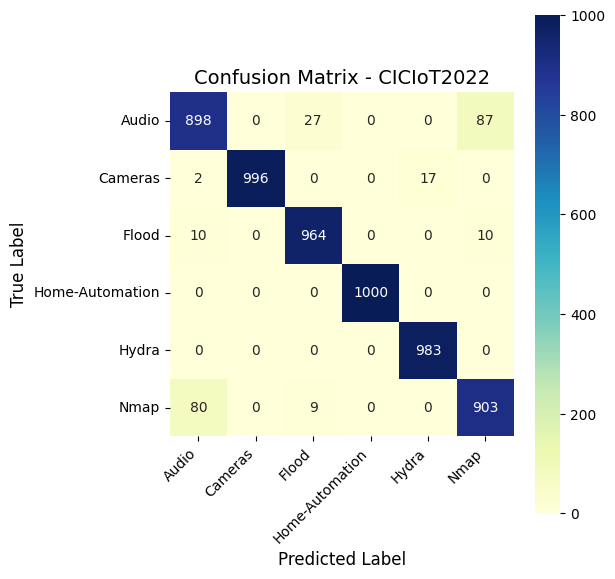

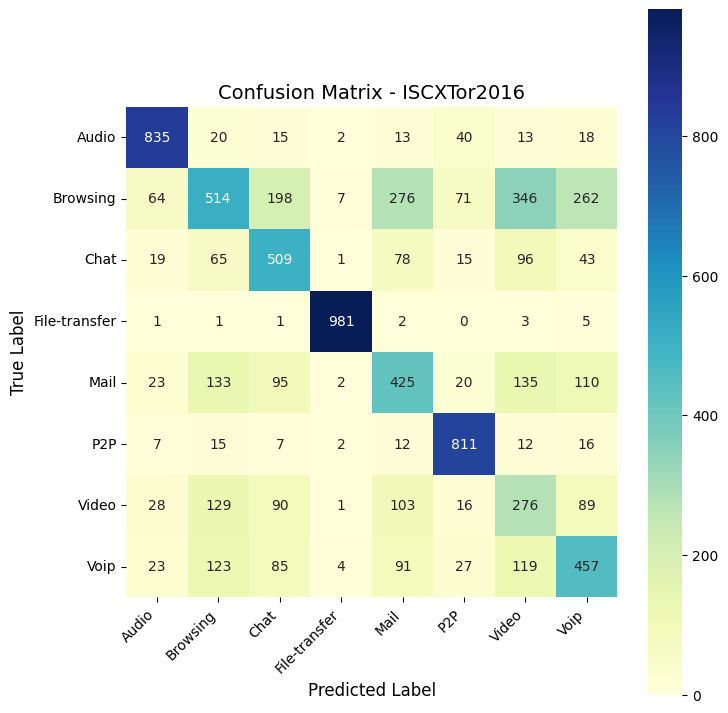

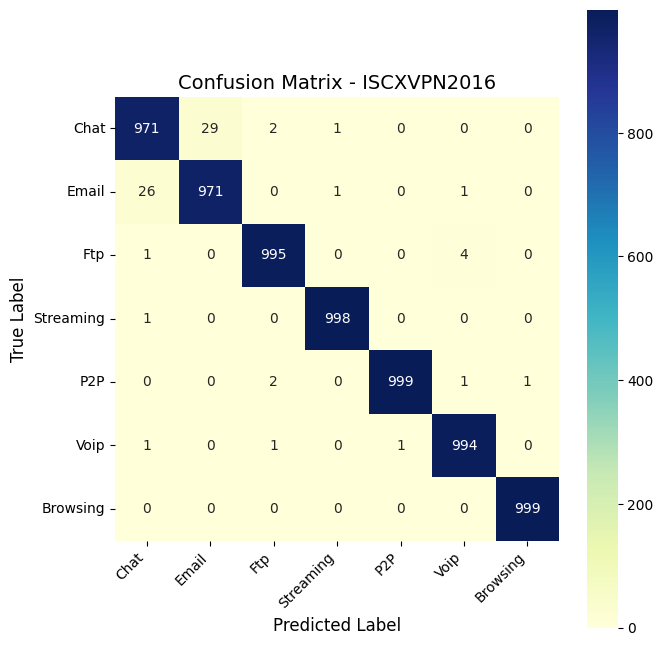

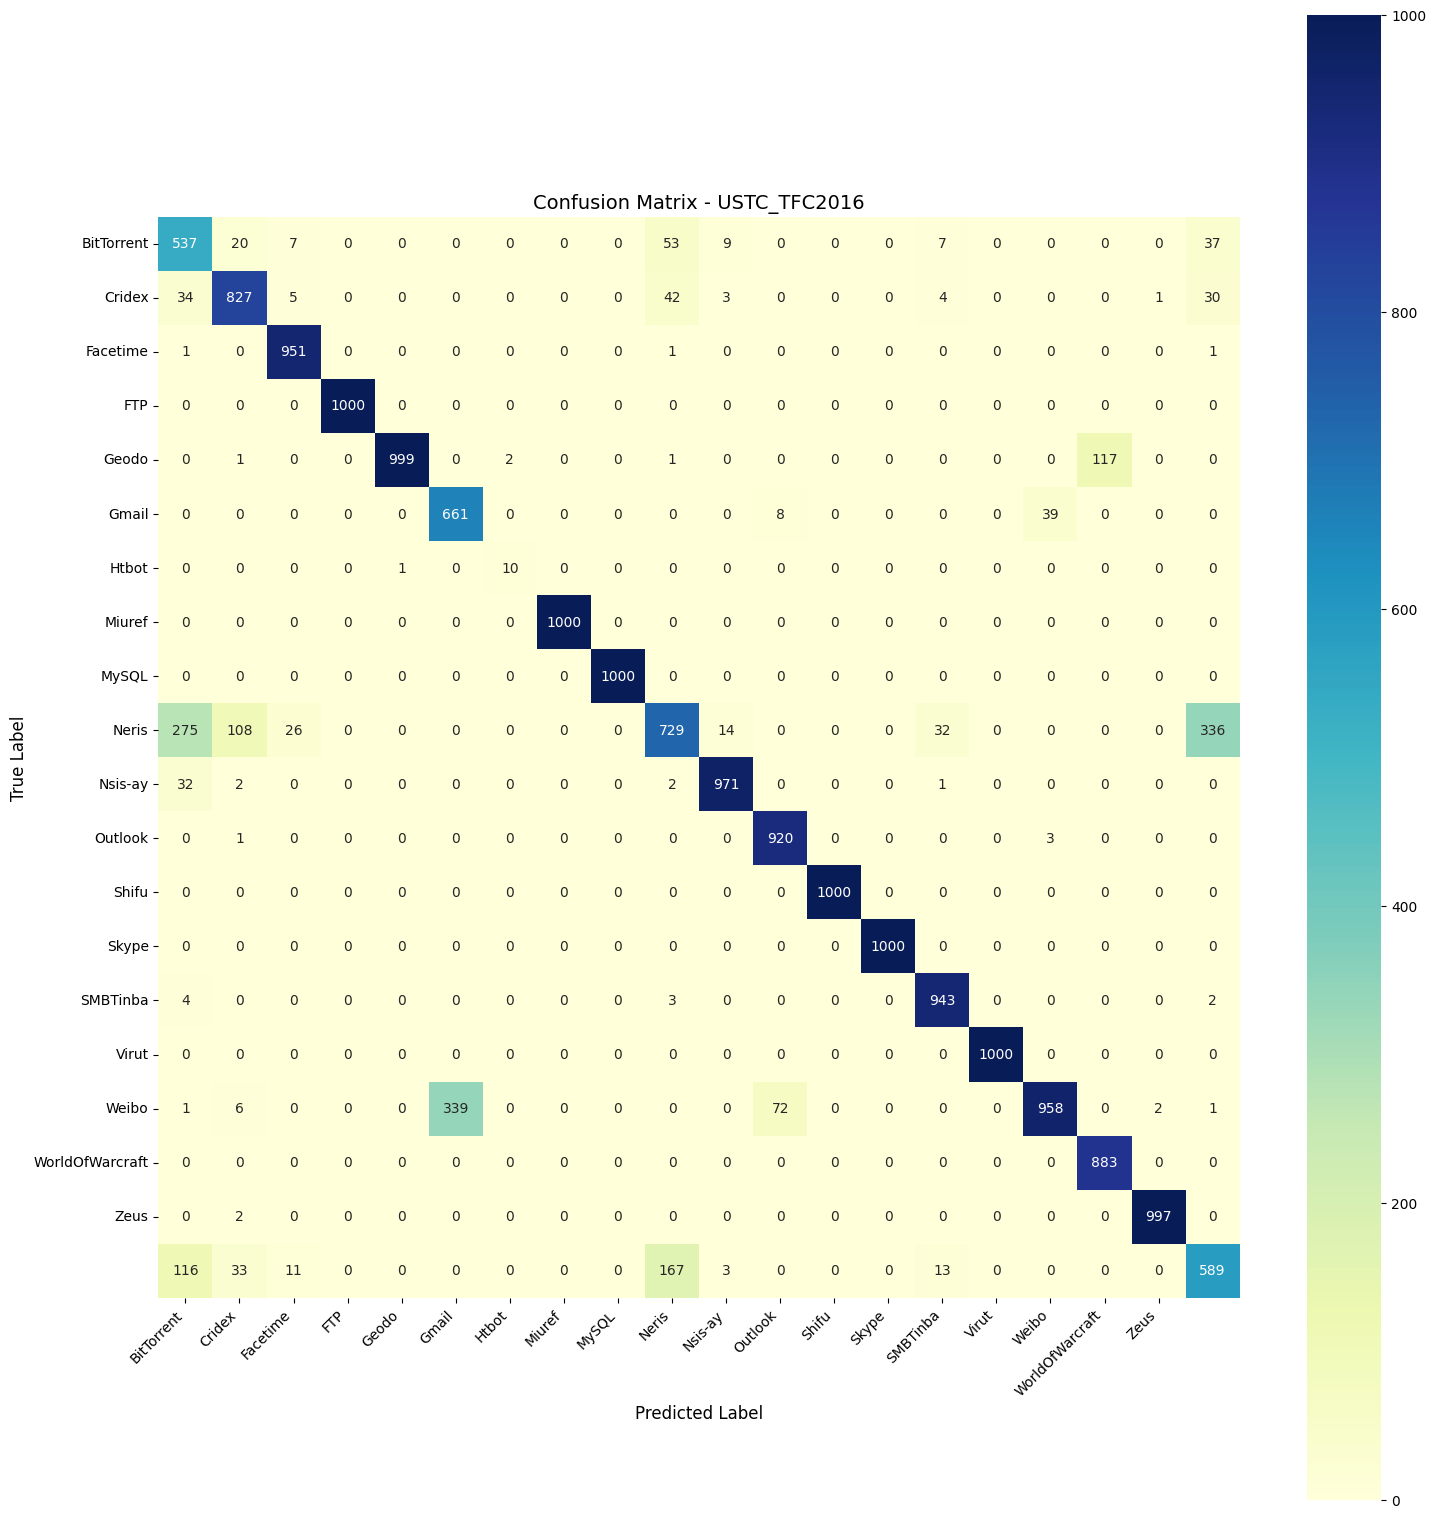

In [ ]:
for dataset, cm in conf_matrices_lstm.items():
    labels = label_mappings_lstm.get(dataset, [str(i) for i in range(len(cm))])  # fallback to indices
    plot_confusion_matrix(cm, dataset, labels)


# graphiques F1 comparaison

Creating multi-metric comparison graph...


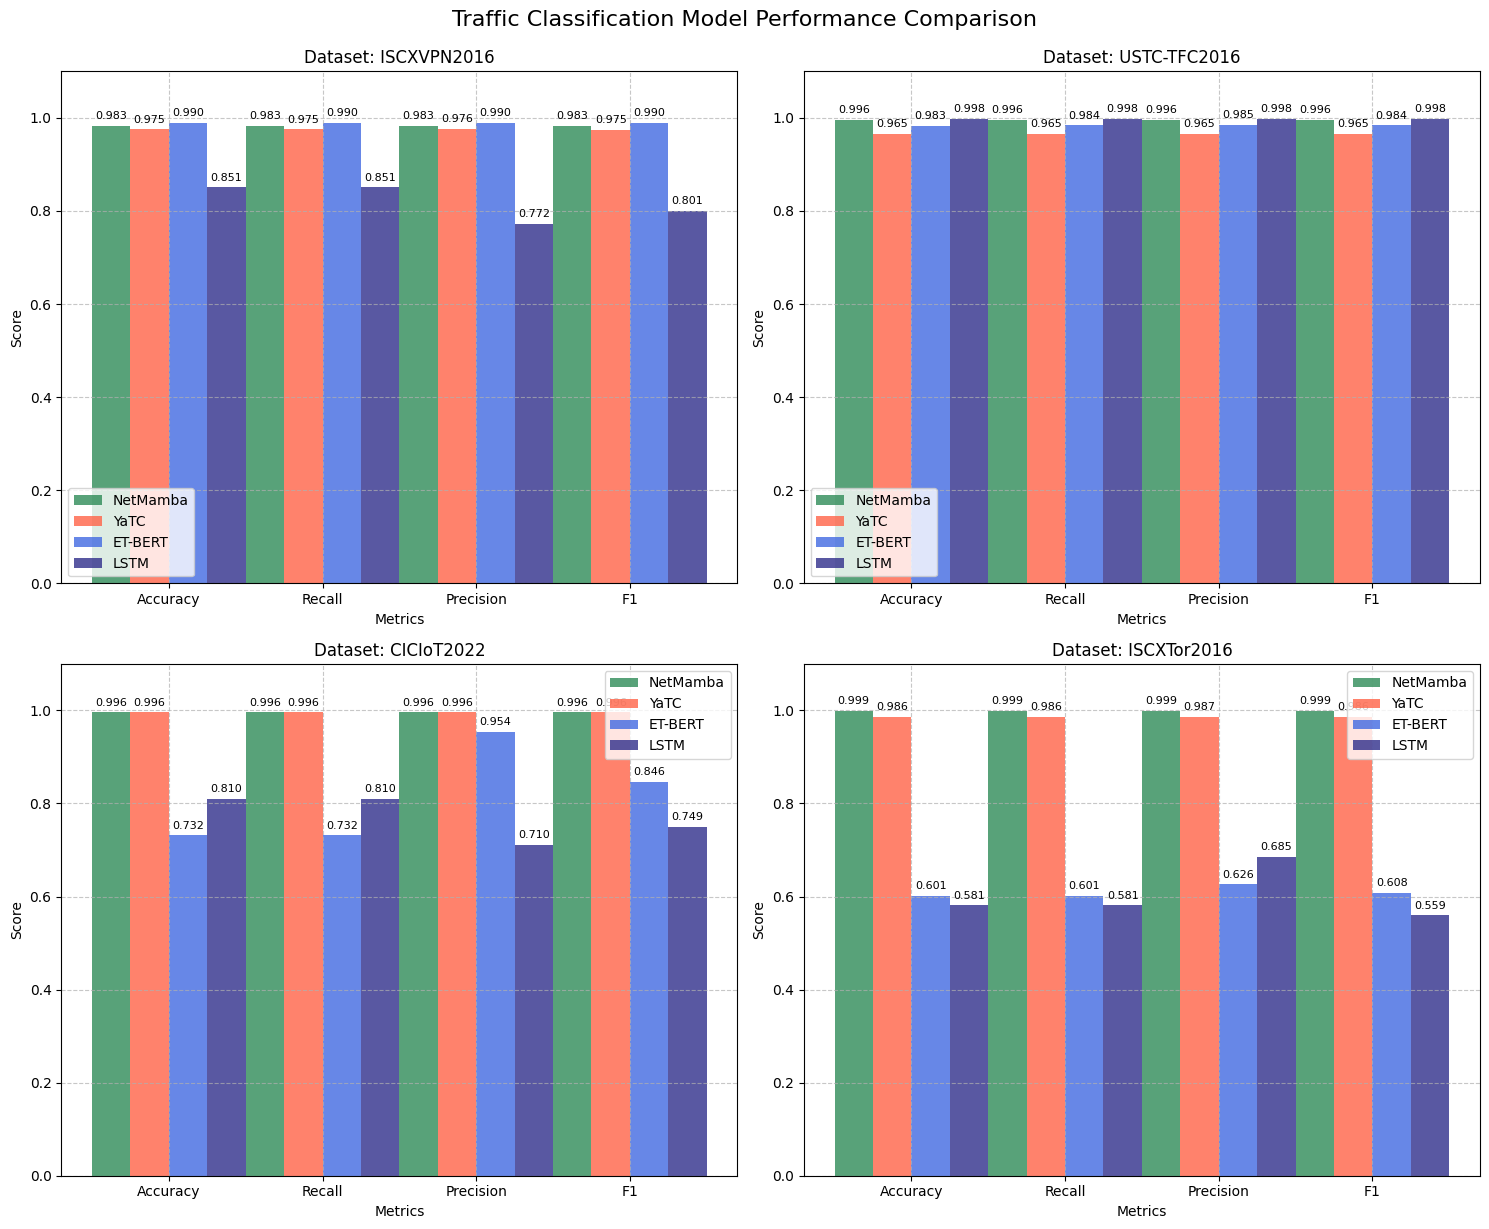

Creating F1 score comparison graph...


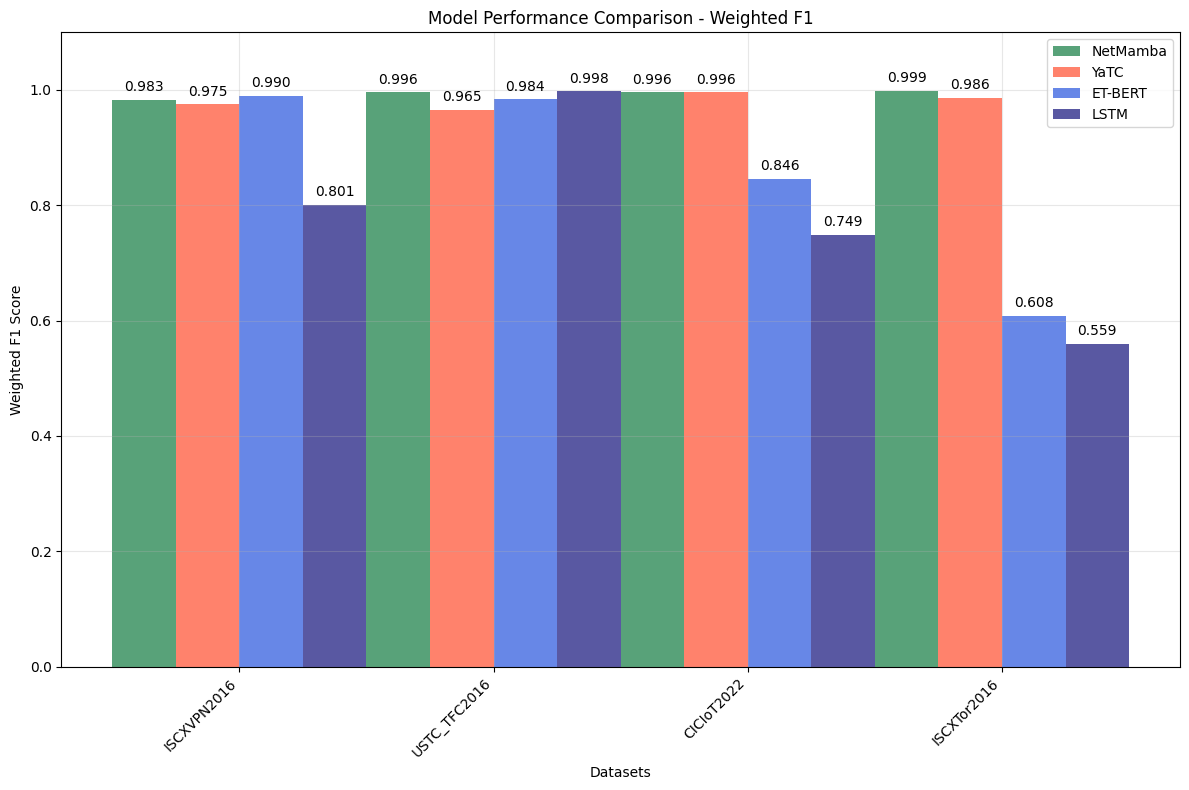

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

def load_results(file_path):
    """Load results from JSON file"""
    with open(file_path, 'r') as f:
        return json.load(f)

def create_comparison_graph():
    # File paths for all models
    path_netMamba = {
        "CICIoT2022": "/content/drive/MyDrive/upwork_data/result_finetuning/result_NetMamba/CICIoT2022/test_stats.json",
        "ISCXTor2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_NetMamba/ISCXTor2016/test_stats.json",
        "ISCXVPN2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_NetMamba/ISCXVPN2016/test_stats.json",
        "USTC_TFC2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_NetMamba/USTC_TFC2016/test_stats.json"
    }

    path_yatc = {
        "CICIoT2022": "/content/drive/MyDrive/upwork_data/result_finetuning/result_yatc/Result_yatc_CICIoT2022.json",
        "ISCXTor2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_yatc/Result_yatc_ISCXTor2016.json",
        "ISCXVPN2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_yatc/Result_yatc_ISCXVPN2016.json",
        "USTC_TFC2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_yatc/Result_yatc_USTC-TFC2016.json"
    }

    path_etbert = {
        "CICIoT2022": "/content/drive/MyDrive/upwork_data/result_finetuning/result_etbert/result_etbert_CICIoT2022.json",
        "ISCXTor2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_etbert/result_etbert_ISCXTor2016.json",
        "ISCXVPN2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_etbert/result_etbert_ISCXVPN2016.json",
        "USTC_TFC2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_etbert/result_etbert_USTC-TFC2016.json"
    }

    path_lstm = {
    "CICIoT2022": "/content/drive/MyDrive/upwork_data/result_finetuning/result_lstm/model_lstm_attention_ciciot_result.json",
    "ISCXTor2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_lstm/model_lstm_attention_tor_result.json",
    "ISCXVPN2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_lstm/model_lstm_attention_iscx_result.json",
    "USTC_TFC2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_lstm/model_lstm_attention_ustf_result.json"

    }


    results_data = {
        'NetMamba': path_netMamba,
        'YaTC': path_yatc,
        'ET-BERT': path_etbert,
        "LSTM": path_lstm
    }

    # Metrics to compare
    metrics = ['acc', 'weighted_rec', 'weighted_pre', 'weighted_f1']
    metric_labels = ['Accuracy', 'Recall', 'Precision', 'F1']

    # Datasets - note the key names match your dictionary keys
    datasets = ['ISCXVPN2016', 'USTC_TFC2016', 'CICIoT2022', 'ISCXTor2016']
    dataset_labels = ['ISCXVPN2016', 'USTC-TFC2016', 'CICIoT2022', 'ISCXTor2016']

    # Colors for different models
    colors = {'NetMamba': '#2E8B57', 'YaTC': '#FF6347', 'ET-BERT': '#4169E1',"LSTM":"#302e8b"}

    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()

    # Width of bars
    bar_width = 0.25

    for dataset_idx, dataset in enumerate(datasets):
        ax = axes[dataset_idx]

        # Positions for bars
        x_pos = np.arange(len(metrics))

        model_idx = 0
        for model_name in results_data.keys():
            try:
                # Load the results file
                file_path = results_data[model_name][dataset]
                if Path(file_path).exists():
                    results = load_results(file_path)

                    # Extract metric values
                    values = []
                    for metric in metrics:
                        if metric in results:
                            values.append(results[metric])
                        else:
                            values.append(0)  # Default if metric not found

                    # Plot bars
                    bars = ax.bar(x_pos + model_idx * bar_width, values,
                                bar_width, label=model_name,
                                color=colors.get(model_name, f'C{model_idx}'),
                                alpha=0.8)

                    # Add value labels on bars
                    for bar, value in zip(bars, values):
                        height = bar.get_height()
                        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                               f'{value:.3f}', ha='center', va='bottom', fontsize=8)

                    model_idx += 1

            except FileNotFoundError:
                print(f"Warning: File not found for {model_name} - {dataset}")
                continue
            except Exception as e:
                print(f"Error loading {model_name} - {dataset}: {e}")
                continue

        # Customize subplot
        ax.set_xlabel('Metrics')
        ax.set_ylabel('Score')
        ax.set_title(f'Dataset: {dataset_labels[dataset_idx]}')
        ax.set_xticks(x_pos + bar_width * (len(results_data) - 1) / 2)
        ax.set_xticklabels(metric_labels)
        ax.set_ylim(0, 1.1)
        ax.grid(True, alpha=0.3)
        ax.legend()

        # Add grid for better readability
        ax.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.suptitle('Traffic Classification Model Performance Comparison',
                 fontsize=16, y=1.02)

    # save the figure
    plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
    # Show the plot
    plt.show()

def create_single_metric_comparison(metric='weighted_f1'):
    """Create a comparison graph for a single metric across all datasets"""

    # File paths for all models
    path_netMamba = {
        "CICIoT2022": "/content/drive/MyDrive/upwork_data/result_finetuning/result_NetMamba/CICIoT2022/test_stats.json",
        "ISCXTor2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_NetMamba/ISCXTor2016/test_stats.json",
        "ISCXVPN2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_NetMamba/ISCXVPN2016/test_stats.json",
        "USTC_TFC2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_NetMamba/USTC_TFC2016/test_stats.json"
    }

    path_yatc = {
        "CICIoT2022": "/content/drive/MyDrive/upwork_data/result_finetuning/result_yatc/Result_yatc_CICIoT2022.json",
        "ISCXTor2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_yatc/Result_yatc_ISCXTor2016.json",
        "ISCXVPN2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_yatc/Result_yatc_ISCXVPN2016.json",
        "USTC_TFC2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_yatc/Result_yatc_USTC-TFC2016.json"
    }

    path_etbert = {
        "CICIoT2022": "/content/drive/MyDrive/upwork_data/result_finetuning/result_etbert/result_etbert_CICIoT2022.json",
        "ISCXTor2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_etbert/result_etbert_ISCXTor2016.json",
        "ISCXVPN2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_etbert/result_etbert_ISCXVPN2016.json",
        "USTC_TFC2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_etbert/result_etbert_USTC-TFC2016.json"
    }

    path_lstm = {
    "CICIoT2022": "/content/drive/MyDrive/upwork_data/result_finetuning/result_lstm/model_lstm_attention_ciciot_result.json",
    "ISCXTor2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_lstm/model_lstm_attention_tor_result.json",
    "ISCXVPN2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_lstm/model_lstm_attention_iscx_result.json",
    "USTC_TFC2016": "/content/drive/MyDrive/upwork_data/result_finetuning/result_lstm/model_lstm_attention_ustf_result.json"

    }



    results_data = {
        'NetMamba': path_netMamba,
        'YaTC': path_yatc,
        'ET-BERT': path_etbert,
        "LSTM": path_lstm
    }

    datasets = ['ISCXVPN2016', 'USTC_TFC2016', 'CICIoT2022', 'ISCXTor2016']
    colors = {'NetMamba': '#2E8B57', 'YaTC': '#FF6347', 'ET-BERT': '#4169E1',"LSTM":"#302e8b"}

    fig, ax = plt.subplots(figsize=(12, 8))

    bar_width = 0.25
    x_pos = np.arange(len(datasets))

    model_idx = 0
    for model_name in results_data.keys():
        values = []

        for dataset in datasets:
            try:
                file_path = results_data[model_name][dataset]
                if Path(file_path).exists():
                    results = load_results(file_path)
                    values.append(results.get(metric, 0))
                else:
                    values.append(0)
            except:
                values.append(0)

        bars = ax.bar(x_pos + model_idx * bar_width, values,
                     bar_width, label=model_name,
                     color=colors.get(model_name, f'C{model_idx}'),
                     alpha=0.8)

        # Add value labels on bars
        for bar, value in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.3f}', ha='center', va='bottom', fontsize=10)

        model_idx += 1

    ax.set_xlabel('Datasets')
    ax.set_ylabel(f'{metric.replace("_", " ").title()} Score')
    ax.set_title(f'Model Performance Comparison - {metric.replace("_", " ").title()}')
    ax.set_xticks(x_pos + bar_width * (len(results_data) - 1) / 2)
    ax.set_xticklabels(datasets, rotation=45, ha='right')
    ax.set_ylim(0, 1.1)
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    # save the figure
    plt.savefig('model_comparison_f1.png', dpi=300, bbox_inches='tight')
    #show the file
    plt.show()


if __name__ == "__main__":
    # Create the main comparison graph
    print("Creating multi-metric comparison graph...")
    create_comparison_graph()

    # Create a single metric comparison (F1 score)
    print("Creating F1 score comparison graph...")
    create_single_metric_comparison('weighted_f1')